<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#План-выполнение-проекта-и-перечень-основных-задач" data-toc-modified-id="План-выполнение-проекта-и-перечень-основных-задач-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>План выполнение проекта и перечень основных задач</a></span></li><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Файл-с-данными-и-общая-информация-о-датасете" data-toc-modified-id="Файл-с-данными-и-общая-информация-о-датасете-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Файл с данными и общая информация о датасете</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-пропущенных-значений-и-дубликатов" data-toc-modified-id="Проверка-пропущенных-значений-и-дубликатов-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Проверка пропущенных значений и дубликатов</a></span></li><li><span><a href="#Проверка-наличия-дисбаланса-классов" data-toc-modified-id="Проверка-наличия-дисбаланса-классов-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Проверка наличия дисбаланса классов</a></span></li></ul></li><li><span><a href="#Лемматизация-и-регулярные-выражения" data-toc-modified-id="Лемматизация-и-регулярные-выражения-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Лемматизация и регулярные выражения</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Модель-логистической-регресии" data-toc-modified-id="Модель-логистической-регресии-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Модель логистической регресии</a></span></li><li><span><a href="#Модель-CatBoostClassifier" data-toc-modified-id="Модель-CatBoostClassifier-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Модель CatBoostClassifier</a></span></li><li><span><a href="#Выбор-оптимальной-модели" data-toc-modified-id="Выбор-оптимальной-модели-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Выбор оптимальной модели</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Проект по классификации тональности текстовых комментариев

## Описание проекта

Интернет-магазин запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Необходимо обучить модель классифицировать комментарии на позитивные и негативные. В распоряжении набор данных с разметкой о токсичности правок.

Метрика качества *F1* не меньше 0.75. 

## Описание данных

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## План выполнение проекта и перечень основных задач

**Краткий план выполнения проекта**

1. Загрузить и подготовить данные;
2. Обучить разные модели;
3. Выбрать оптимальную модель;
4. Сделать выводы.


## Загрузка и подготовка данных

### Файл с данными и общая информация о датасете

Загрузим требуемые для работы библиотеки, прочитаем csv-файл с данными и посмотрим общую информацию о датасете.

In [1]:
# импортируем необходимые в работе библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import spacy

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import f1_score

import random
from sklearn.utils import shuffle

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# выделение в переменную random state
RANDOM_STATE=12345

In [3]:
# чтение файла, сохранение данных в переменной data

data = pd.read_csv('/datasets/toxic_comments.csv')

In [4]:
# просмотр первых 5 строк с данными датасета
data.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [5]:
#вывод общей информации о датасете
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


(159292, 3)

**Промежуточный вывод о датасете:** В представленном датасете содержатся данные о твитах. Текст твитов на английском языке. Всего 159 292 строк и 3 столбца, один из которых совпадает с нумерацией записей (Unnamed: 0), предположительно данный столбец не понадобится и можно будет его удалить.

### Предобработка данных

Проверим потребуется какая-то преобработка данных в общем смысле. И далее перейдем к подготовке текста к ML.

#### Проверка пропущенных значений и дубликатов

In [6]:
# проверка наличия пропущенных значений
data.isna().sum()

Unnamed: 0    0
text          0
toxic         0
dtype: int64

In [7]:
# проверка на явные дубликаты
data.duplicated().sum()

0

In [8]:
# удаление признаков, неучаствующих в моделировании
del data['Unnamed: 0']

In [9]:
# просмотр первых 5 строк с данными датасета
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


#### Проверка наличия дисбаланса классов

Посмотрим, как распределяются данные в столбце toxic по количеству подходящих и токстичных комментариев.

In [10]:
# количество подходящих (0) и токсичных (1) комментариев
data['toxic'].value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

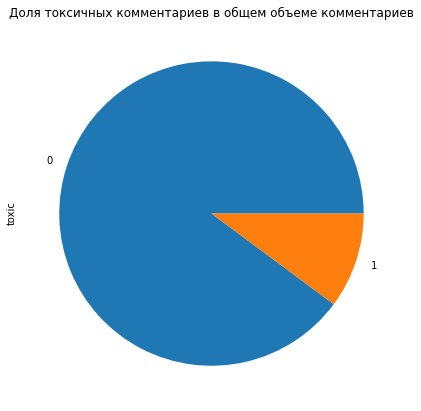

In [11]:
# визуализация на графике
data['toxic'].value_counts().plot(y='toxic', kind='pie', figsize=(7,7), title='Доля токсичных комментариев в общем объеме комментариев');

Исходя из анализа, видно, что присутствует дисбаланс классов: доля токсичных комментариев клиентов существенно ниже обычных комментариев (составляет 10% от общей доли комментариев). По логике так и должно быть в большинстве случаев. Но для корректных предсказаний модели будем устранять дисбаланс классов. 

### Лемматизация и регулярные выражения 

Текст на английском языке, поэтому переводить в Юникод не потребуется.

In [13]:
# приведение текста к нижнему регистру
data['text'] = data['text'].str.lower()

In [14]:
# использование spacy и загрузка модели «en»
nlp = spacy.load("en_core_web_sm")

In [15]:
# функция лемматизации с использованием spacy

def lemmatize(text):
    doc = nlp(text)
    tokens = []
    for token in doc:
        tokens.append(token)
        
    lemm_text = " ".join([token.lemma_ for token in doc])
        
    return lemm_text

# функция очистки текста от лишних символов

def clear_text(text):
    #text = re.sub(r'[\n\r]', ' ', text)
    text = re.sub(r'[^a-zA-Z ]', ' ', text)
    re_text = " ".join(text.split())
    
    return re_text


In [16]:
%%time

# применение функции очистки текста, сохранение в переменные
data['clear_text'] = data['text'].apply(clear_text)

data[['text', 'clear_text']].head()

CPU times: user 2.3 s, sys: 32.6 ms, total: 2.33 s
Wall time: 2.34 s


,text,clear_text
0,explanation\nwhy the edits made under my usern...,explanation why the edits made under my userna...
1,d'aww! he matches this background colour i'm s...,d aww he matches this background colour i m se...
2,"hey man, i'm really not trying to edit war. it...",hey man i m really not trying to edit war it s...
3,"""\nmore\ni can't make any real suggestions on ...",more i can t make any real suggestions on impr...
4,"you, sir, are my hero. any chance you remember...",you sir are my hero any chance you remember wh...


In [17]:
%%time

# применение функции лемматизации, сохранение в переменные
data['lemm_text'] = data['clear_text'].apply(lemmatize)

data[['text', 'lemm_text']].head()

CPU times: user 40min 25s, sys: 5.72 s, total: 40min 31s
Wall time: 40min 32s


,text,lemm_text
0,explanation\nwhy the edits made under my usern...,explanation why the edit make under my usernam...
1,d'aww! he matches this background colour i'm s...,d aww he match this background colour I m seem...
2,"hey man, i'm really not trying to edit war. it...",hey man I m really not try to edit war it s ju...
3,"""\nmore\ni can't make any real suggestions on ...",more I can t make any real suggestion on impro...
4,"you, sir, are my hero. any chance you remember...",you sir be my hero any chance you remember wha...


## Обучение

Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. Мы имеем набор данных с разметкой о токсичности правок (0 и 1). В этом случае решаем задачу классификации. Для сравнения будем использовать две модели: модель Логистической регрессии и бустинговую модель CatBoostClassifier.

### Подготовка данных

In [18]:
# создание признаков и таргета
features = data['lemm_text']
target = data['toxic']

In [19]:
# разделение на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=RANDOM_STATE)

display(features_train.shape)
display(features_test.shape)

(127433,)

(31859,)

Устраним дисбаланс классов. Есть несколько способов. Опытным путем определено, что взвешивание классов не улучшает результирущие показатели модели. Увеличивать выборку не будет, так как размер текущего датасета достаточно большой. Поэтому сделаем объекты частого класса не такими частыми с помощью техники downsampling.

In [20]:
# функция для уменьшения выборки более частого класса
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_train_downsampled, target_train_downsampled = downsample(features_train, target_train, 0.20)

display(features_train_downsampled.shape)
display(target_train_downsampled.shape)


(35851,)

(35851,)

In [21]:
# создадим корпус постов для обучающей выборки
corpus_train = features_train_downsampled.values

In [22]:
# создадим корпус постов для тестовой выборки
corpus_test = features_test.values

In [23]:
# создайте новый мешок слов с учётом стоп-слов
stop_words = set(stopwords.words('english'))

for w in corpus_train:
    if w not in stop_words:
        pass 
    
# создание матрицы cо значениями TF-IDF по обучающей выборке с указанием стоп-слов, сохранение её в переменной tf_idf.
count_vect = CountVectorizer(stop_words=stop_words)
count_tf_idf = TfidfVectorizer(stop_words=stop_words)
tf_idf_train = count_tf_idf.fit_transform(corpus_train) 
print(tf_idf_train)
print("Размер мешка с учётом стоп-слов:", tf_idf_train.shape)

  (0, 11402)	0.31994957411051084
  (0, 28943)	0.34337053589934174
  (0, 40107)	0.36926790195207543
  (0, 50848)	0.32776951791437453
  (0, 41003)	0.3384734495247703
  (0, 27921)	0.16963375241653414
  (0, 47100)	0.5268851238827102
  (0, 26484)	0.3391009953624175
  (1, 41931)	0.05280466996004736
  (1, 41542)	0.07030176352459827
  (1, 45362)	0.07654668623194599
  (1, 9114)	0.06192692108066325
  (1, 31877)	0.0752981372688176
  (1, 492)	0.05513390247269622
  (1, 47338)	0.1340976689812094
  (1, 20552)	0.12700154604776953
  (1, 32493)	0.12348458796429254
  (1, 44570)	0.08781438691741854
  (1, 34278)	0.07901453135018753
  (1, 39734)	0.0663871254919563
  (1, 42427)	0.10509700783569767
  (1, 55563)	0.08319246962362582
  (1, 55502)	0.08348253825192614
  (1, 39985)	0.10816936581234941
  (1, 23999)	0.12348458796429254
  :	:
  (35849, 47285)	0.08071302152685728
  (35849, 8268)	0.2152442213934471
  (35849, 41695)	0.09434147593174885
  (35849, 45224)	0.18245714821464062
  (35849, 52411)	0.2393939741317

In [24]:
# создание матрицы cо значениями TF-IDF по тестовой выборке 

tf_idf_test = count_tf_idf.transform(corpus_test) 
print(tf_idf_test)
print("Размер мешка с учётом стоп-слов:", tf_idf_test.shape)

  (0, 56705)	0.18798162691928036
  (0, 54126)	0.2801311090538654
  (0, 50731)	0.18716382762099942
  (0, 40681)	0.20187308968217965
  (0, 40169)	0.27977119129786976
  (0, 38756)	0.19928322183539132
  (0, 37472)	0.29037718312688954
  (0, 34206)	0.2790594642493019
  (0, 31828)	0.2155695187035034
  (0, 24038)	0.3020159727753436
  (0, 21126)	0.22099423689910164
  (0, 17385)	0.1928081030949761
  (0, 17156)	0.29660105020380034
  (0, 16975)	0.4675020282000155
  (1, 49730)	0.24186856756398473
  (1, 35070)	0.7144858433726684
  (1, 17692)	0.6565131953316649
  (2, 49730)	0.1403845981803335
  (2, 46164)	0.2539545609793107
  (2, 45966)	0.212372661789445
  (2, 32396)	0.3094776305276182
  (2, 27921)	0.1543798473577182
  (2, 24999)	0.5239868903505629
  (2, 24722)	0.39947337266865557
  (2, 16817)	0.18210324668541075
  :	:
  (31857, 25958)	0.10029849316699326
  (31857, 24774)	0.17449970406285245
  (31857, 24630)	0.1439025504386868
  (31857, 24547)	0.14583662513260442
  (31857, 22193)	0.22103075424250124


In [25]:
# переименуем признаки в привычное название
features_train=tf_idf_train
features_test=tf_idf_test

In [26]:
# проверка размера признаков и таргерта
display(features_train)
display(features_test)
display(target_train_downsampled)
display(target_test)

<35851x57776 sparse matrix of type '<class 'numpy.float64'>'
	with 846332 stored elements in Compressed Sparse Row format>

<31859x57776 sparse matrix of type '<class 'numpy.float64'>'
	with 797560 stored elements in Compressed Sparse Row format>

111378    0
36222     0
101696    1
90495     1
2925      0
         ..
100941    0
23991     0
82464     0
150069    0
143852    0
Name: toxic, Length: 35851, dtype: int64

109486    0
104980    1
82166     0
18721     0
128178    0
         ..
74512     0
143247    1
60432     0
99864     0
119194    0
Name: toxic, Length: 31859, dtype: int64

### Модель логистической регресии

In [27]:
# параметры для GridSearchCV для модели логистической регрессии
parameters_lr = {'C': (0.1, 1, 10), 'solver': ('newton-cg', 'lbfgs', 'liblinear')}

In [28]:
%%time

# обучение и подбор гиперпараметров для модели LogisticRegression

model_lr = LogisticRegression(random_state=RANDOM_STATE)
grid_lr = GridSearchCV(model_lr, parameters_lr, cv=3, scoring='f1')
grid_lr.fit(features_train, target_train_downsampled)
print(grid_lr.best_params_)
print(grid_lr.best_score_)


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

{'C': 10, 'solver': 'lbfgs'}
0.8599616886671194
CPU times: user 59.1 s, sys: 2min 30s, total: 3min 30s
Wall time: 3min 30s


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# вывод результатов
results = pd.DataFrame(grid_lr.cv_results_)
display(results)
display(results[results['rank_test_score'] == 1])
fit_time_lr = results[results['rank_test_score'] == 1]['mean_fit_time'].values[0]
predict_time_lr = results[results['rank_test_score'] == 1]['mean_score_time'].values[0]
print(f'Fit_time_lr: {fit_time_lr}, predict_time_lr: {predict_time_lr}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.980833,0.058256,0.034885,0.041127,0.1,newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.707068,0.718782,0.717014,0.714288,0.005156,8
1,9.700507,0.565918,0.095047,0.002029,0.1,lbfgs,"{'C': 0.1, 'solver': 'lbfgs'}",0.707068,0.718782,0.717014,0.714288,0.005156,8
2,0.935148,0.124436,0.065047,0.040575,0.1,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",0.707068,0.720081,0.717949,0.715033,0.005699,7
3,5.692442,0.001414,0.005919,0.000211,1,newton-cg,"{'C': 1, 'solver': 'newton-cg'}",0.828937,0.835984,0.840138,0.835020,0.004623,4
4,14.133016,1.552546,0.037636,0.040092,1,lbfgs,"{'C': 1, 'solver': 'lbfgs'}",0.828937,0.835836,0.839990,0.834921,0.004558,5
5,1.771995,0.330732,0.095406,0.001645,1,liblinear,"{'C': 1, 'solver': 'liblinear'}",0.828831,0.835878,0.839841,0.834850,0.004553,6
6,7.893019,0.420908,0.006951,0.001066,10,newton-cg,"{'C': 10, 'solver': 'newton-cg'}",0.860716,0.858300,0.859956,0.859657,0.001009,3
7,13.731845,0.949055,0.064655,0.040555,10,lbfgs,"{'C': 10, 'solver': 'lbfgs'}",0.860611,0.858334,0.860940,0.859962,0.001159,1
8,2.902613,0.078592,0.064729,0.040622,10,liblinear,"{'C': 10, 'solver': 'liblinear'}",0.860611,0.858440,0.859956,0.859669,0.000909,2


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,13.731845,0.949055,0.064655,0.040555,10,lbfgs,"{'C': 10, 'solver': 'lbfgs'}",0.860611,0.858334,0.86094,0.859962,0.001159,1


Fit_time_lr: 13.731844584147135, predict_time_lr: 0.06465474764506023


### Модель CatBoostClassifier

In [30]:
# параметры для GridSearchCV для модели CatBoost
parameters_cbc = {'iterations': range(20, 60, 20)}

In [31]:
%%time
# обучение и подбор гиперпараметров для модели CatBoostClassifier

model_cbc = CatBoostClassifier(loss_function='Logloss', random_seed=RANDOM_STATE)
grid_cbc = GridSearchCV(model_cbc, parameters_cbc, cv=3, scoring='f1')
grid_cbc.fit(features_train, target_train_downsampled)
print(grid_cbc.best_params_)
print(grid_cbc.best_score_)


Learning rate set to 0.5
0:	learn: 0.5452935	total: 860ms	remaining: 16.3s
1:	learn: 0.4783362	total: 1.47s	remaining: 13.2s
2:	learn: 0.4440453	total: 2.09s	remaining: 11.8s
3:	learn: 0.4217818	total: 2.68s	remaining: 10.7s
4:	learn: 0.4074729	total: 3.27s	remaining: 9.81s
5:	learn: 0.3951853	total: 3.87s	remaining: 9.02s
6:	learn: 0.3840373	total: 4.49s	remaining: 8.33s
7:	learn: 0.3746824	total: 5.08s	remaining: 7.63s
8:	learn: 0.3669566	total: 5.67s	remaining: 6.93s
9:	learn: 0.3615377	total: 6.27s	remaining: 6.27s
10:	learn: 0.3559888	total: 6.86s	remaining: 5.61s
11:	learn: 0.3497519	total: 7.53s	remaining: 5.02s
12:	learn: 0.3455072	total: 8.13s	remaining: 4.38s
13:	learn: 0.3404405	total: 8.75s	remaining: 3.75s
14:	learn: 0.3357872	total: 9.36s	remaining: 3.12s
15:	learn: 0.3301379	total: 9.96s	remaining: 2.49s
16:	learn: 0.3269594	total: 10.5s	remaining: 1.86s
17:	learn: 0.3236098	total: 11.1s	remaining: 1.24s
18:	learn: 0.3185613	total: 11.7s	remaining: 617ms
19:	learn: 0.314

In [32]:
# вывод результатов
results = pd.DataFrame(grid_cbc.cv_results_)
display(results)
display(results[results['rank_test_score'] == 1])
fit_time_cbc = results[results['rank_test_score'] == 1]['mean_fit_time'].values[0]
predict_time_cbc = results[results['rank_test_score'] == 1]['mean_score_time'].values[0]
print(f'Fit_time: {fit_time_cbc}, predict_time: {predict_time_cbc}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_iterations,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,16.145909,0.098723,0.103572,0.004330,20,{'iterations': 20},0.789495,0.797756,0.791599,0.792950,0.003505,2
1,27.723517,0.070350,0.105040,0.000694,40,{'iterations': 40},0.825425,0.825671,0.829490,0.826862,0.001861,1


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_iterations,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,27.723517,0.07035,0.10504,0.000694,40,{'iterations': 40},0.825425,0.825671,0.82949,0.826862,0.001861,1


Fit_time: 27.723516782124836, predict_time: 0.10503951708475749


### Выбор оптимальной модели

In [33]:
# сводная таблица результирующих значений для выбора оптимальной модели
print('|{: >22}|{: >18}|{: >18}|{: >12}|'.format('Модель', 'Время обучения', 'Время предсказания', 'F1'))
print('|{: >22}|{: >18.5f}|{: >18.5f}|{: >12.5f}|'.format('LogisticRegression', fit_time_lr, predict_time_lr, grid_lr.best_score_))
print('|{: >22}|{: >18.5f}|{: >18.5f}|{: >12.5f}|'.format('CatBoostClassifier', fit_time_cbc, predict_time_cbc, grid_cbc.best_score_))

|                Модель|    Время обучения|Время предсказания|          F1|
|    LogisticRegression|          13.73184|           0.06465|     0.85996|
|    CatBoostClassifier|          27.72352|           0.10504|     0.82686|


Значение метрики f1 у модели LR получиллсь 0.86, у модели CBC получиллсь 0.83.

Наилучший результат предсказаний по метрике F1 показала модель Логистической регрессии с параметрами C = 10, solver = 'newton-cg'. На этой модели проверим предсказания на тестовой выборке.

### Проверка на тестовой выборке

In [34]:
best_model = grid_lr.best_estimator_

In [35]:
%%time

# проверка выбранной оптимальной модели на тестовых данных

predictions_test = best_model.predict(features_test)
f1_lr = f1_score(target_test, predictions_test) 
print('LogisticRegression_Test_F1:', f1_lr)


LogisticRegression_Test_F1: 0.7520420877751628
CPU times: user 8.83 ms, sys: 3.79 ms, total: 12.6 ms
Wall time: 12 ms


Значение показателя F1 на тестовых данных плучилось 0.75, что удовлетворяет требованиям проекта.

## Общий вывод

По условиям проекта необходимо было разработать инструмент для интернет-магазина, который будет искать токсичные комментарии и отправлять их на модерацию. Необходимо было обучить модель классифицировать комментарии на позитивные и негативные. В распоряжении был набор данных с разметкой о токсичности правок в качестве исторических данных.

Был проведен небольшой исследовательский анализ. Исходя из анализа, видно, что присутствует дисбаланс классов: доля токсичных комментариев клиентов существенно ниже обычных комментариев (составляет 10% от общей доли комментариев). Для устранения дисбаланса классов использовалась техника downsampling.

Для решения задачи были проанализированы две модели классификации: модель Логистической регресии и модель градиентного бустинга (CatBoost). Качество предсказание модели оценивается метрикой F1 (не менее 0.75).

Оптимальной для задачи заказчика выбрана модель LogisticRegression(random_state=RANDOM_STATE, C = 10, fit_intercept = False, solver = 'newton-cg').